# Сравнение алгоритмов PCA, SVD, tSNE и UMAP
## Подключение библиотек и загрузка датасетов

In [35]:
import umap
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml, load_digits
from sklearn import datasets, decomposition, manifold, preprocessing
import warnings
import time

In [36]:
with warnings.catch_warnings():
    warnings.simplefilter("ignore")

UMAP = umap.UMAP(n_components=2)
TSNE= manifold.TSNE(n_components=2)
SVD = decomposition.TruncatedSVD(n_components=2)
PCA = decomposition.PCA(n_components=2)

algorithms = [
    ('PCA', PCA), 
    ('SVD', SVD),
    ('UMAP', UMAP), 
    ('TSNE', TSNE)
]

In [37]:
def print_algorithms_results(data_id, load_function,caption):
    fig, axs = plt.subplots(1,4, figsize=(16,4))
    fig.suptitle(f"{caption} dataset", fontsize=16)
    if data_id == None:
        dataset, dataset_labels = load_function(return_X_y=True, as_frame=False)
    else:
        dataset, dataset_labels = load_function(data_id=data_id,return_X_y=True,as_frame=False)
    for i, algorithm in enumerate(algorithms):
        start = time.time()
        with warnings.catch_warnings():
            warnings.simplefilter("ignore")
            results = algorithm[1].fit_transform(dataset)
        print(algorithm[0], time.time() - start, "seconds")
        color = dataset_labels.astype(int)
        axs[i].scatter(results[:,0], results[:,1], c=color)
        axs[i].set_xlabel(algorithm[0])

## Сравнение алгоритмов (время работы, результаты)

PCA 1.0392179489135742 seconds
SVD 0.7699382305145264 seconds
UMAP 24.1535222530365 seconds
TSNE 454.8643100261688 seconds


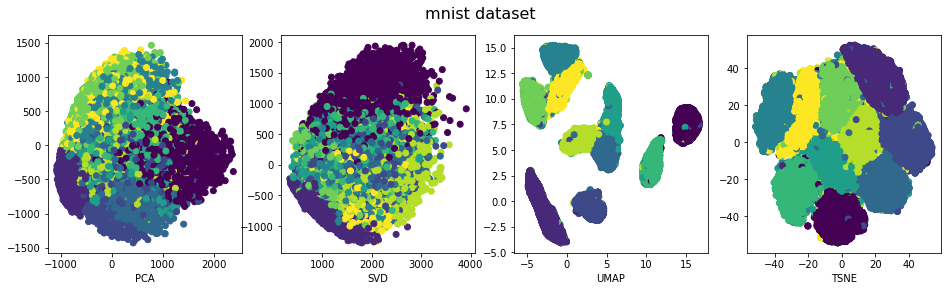

In [38]:
print_algorithms_results(554,fetch_openml,'mnist')

PCA 1.0242598056793213 seconds
SVD 0.7410173416137695 seconds
UMAP 25.35473132133484 seconds
TSNE 452.1192059516907 seconds


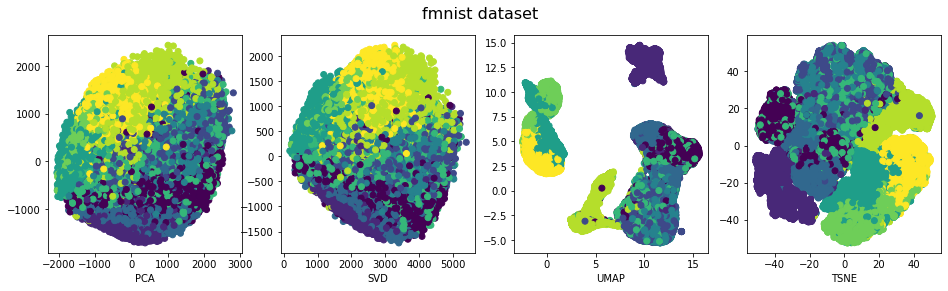

In [39]:
print_algorithms_results(40996,fetch_openml, 'fmnist')

PCA 0.04783821105957031 seconds
SVD 0.05485343933105469 seconds
UMAP 40.808783531188965 seconds
TSNE 287.65430641174316 seconds


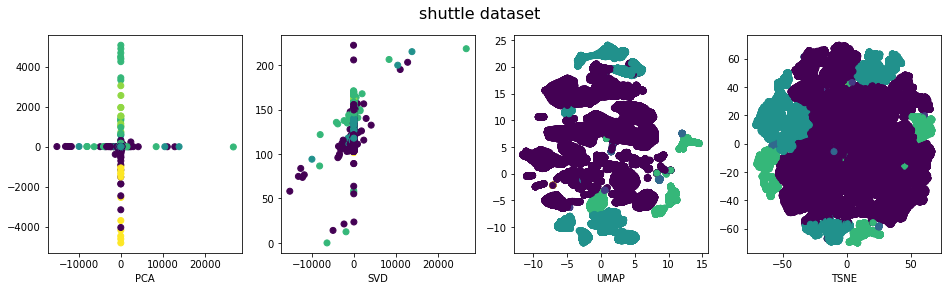

In [40]:
print_algorithms_results(40685,fetch_openml, 'shuttle')

PCA 0.009307622909545898 seconds
SVD 0.001995563507080078 seconds
UMAP 6.316976070404053 seconds
TSNE 7.182779788970947 seconds


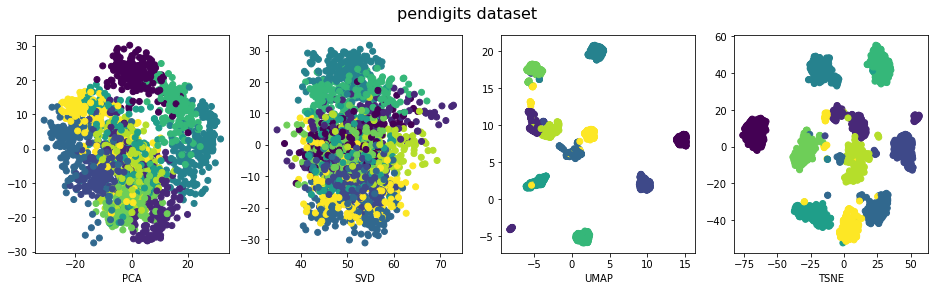

In [41]:
print_algorithms_results(None, load_digits,'pendigits')

## Выводы

Время работы алгоритмов PCA и SVD низкое, однако их качество кластеризации не очень хорошее.
UMAP и tSNE показывают хорошие результаты, но tSNE работает значительно дольше остальных алгоритмов. 
Следовательно, оптимальным выбором будет UMAP.